 # Statistics-4 (CLT & Cls / Confidence Intervals)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Load tips dataset

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Plot a bar chart showing the average of daily total_bill amounts with confidence interval bars.

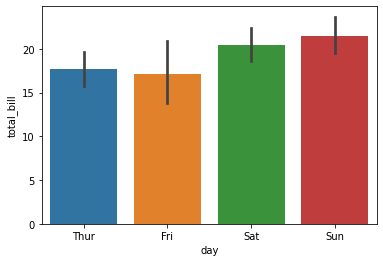

In [6]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95);

Calculate Friday's average total_bill.

In [7]:
xbar = tips[tips["day"] == "Fri"]["total_bill"].mean()
xbar

17.15157894736842

Calculate standard deviation.

In [8]:
s = tips[tips["day"] == "Fri"]["total_bill"].std()
s

8.302659723217145

In [9]:
tips[tips["day"] == "Fri"]["total_bill"].std() / np.sqrt(len(tips[tips["day"] == "Fri"]["total_bill"]))

1.9047607734794163

Calculate standard error of the mean.

In [10]:
sem = tips[tips["day"] == "Fri"]["total_bill"].sem()
sem

1.9047607734794163

Calculate margin of error.

In [11]:
moe = 1.96 * sem
moe

3.733331116019656

Calculate lower limit and upper limit.

In [12]:
lower_limit = xbar - moe
lower_limit

13.418247831348765

In [13]:
upper_limit = xbar + moe
upper_limit

20.884910063388077

In [14]:
stats.norm.interval(0.95, loc=xbar, scale=sem)

(13.41831643218411, 20.884841462552732)

In [15]:
n = len(tips[tips["day"] == "Fri"]["total_bill"])
n

19

In [16]:
stats.t.interval(0.95, df=n-1, loc=xbar, scale=sem)

(13.149825056979097, 21.153332837757745)

In [17]:
#Relevant dataset
#mean
#standard error of the mean
#degrees of freedom
#confidence interval code from scipy 

Saturday total_bill?

In [18]:
xbar = tips[tips["day"] == "Sat"]["total_bill"].mean()
xbar

20.441379310344825

In [19]:
sem = tips[tips["day"] == "Sat"]["total_bill"].sem()
sem

1.016407566061897

In [20]:
n = len(tips[tips["day"] == "Sat"]["total_bill"])
n

87

In [21]:
stats.t.interval(0.95, n-1, xbar, sem)  #this is the best (t distribution)

(18.420827942450163, 22.461930678239487)

In [22]:
stats.norm.interval(0.95, xbar, sem)

(18.449257087249492, 22.433501533440158)

In [23]:
stats.t.interval(0.99, n-1, xbar, sem)  #The higher the confidence level, the wider the confidence interval.

(17.76394599025322, 23.11881263043643)